This tutorial continues part one, and recovers planets *c* and *d* in the K2-3 system. Planet *d* is a Super-Earth in the habitable zone. First, we recover planet *b* again:

In [1]:
import numpy
import scipy
import everest
from astropy.stats import sigma_clip
import matplotlib.pyplot as plt
import logging
logging.basicConfig(level=logging.DEBUG)
logger = logging.getLogger('matplotlib')
logger.setLevel(logging.CRITICAL)
from matplotlib import rcParams; rcParams["figure.dpi"] = 150
EPIC_id = 201367065        
star = everest.Everest(EPIC_id)
t = numpy.delete(star.time, star.badmask)
y = numpy.delete(star.fcor, star.badmask)
t = numpy.array(t[~numpy.isnan(y)], dtype='float32')
y = numpy.array(y[~numpy.isnan(y)], dtype='float32')
trend = scipy.signal.medfilt(y, 25)
y_filt = y /trend
y_filt = sigma_clip(y_filt, sigma_upper=2, sigma_lower=float('inf'))
from transitleastsquares import transitleastsquares
model = transitleastsquares(t, y_filt)
results = model.power()
plt.figure()
plt.plot(
    results.model_folded_phase,
    results.model_folded_model,
    color='red')
plt.scatter(
    results.folded_phase,
    results.folded_y,
    color='blue',
    s=10,
    alpha=0.5,
    zorder=2)
plt.xlim(0.49, 0.51)
plt.xlabel('Phase')
plt.ylabel('Relative flux');

/home/michael/.local/lib/python3.6/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


INFO  [everest.user.DownloadFile()]: Found cached file.
INFO  [everest.user.load_fits()]: Loading FITS file for 201367065.
Transit Least Squares TLS 1.0.7 (04 January 2019)
Creating model cache for 36 durations
Searching 3632 data points, 8505 periods from 0.602 to 40.036 days, using all 8 CPU threads


100%|██████████| 8505/8505 periods | 00:16<00:00  
  0%|          | 5/3632 [00:00<01:12, 49.77it/s]

Searching for best T0 for period 10.05282


100%|██████████| 3632/3632 [00:02<00:00, 1668.35it/s]


Now, we use the ``transit_mask`` function to mask the in-transit points of planet *b*. There are apparently more transits of another planet:

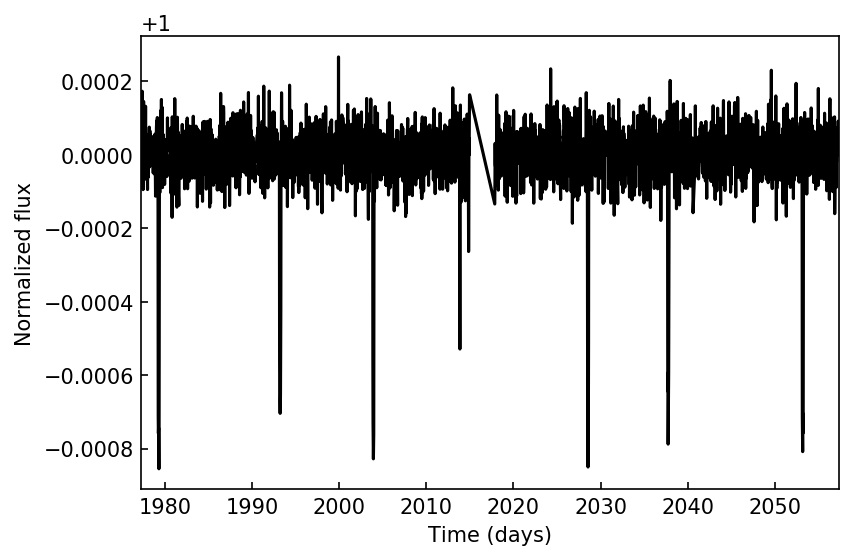

In [2]:
from transitleastsquares import transit_mask, cleaned_array
intransit = transit_mask(t, results.period, 2*results.duration, results.T0)
y_second_run = y_filt[~intransit]
t_second_run = t[~intransit]
t_second_run, y_second_run = cleaned_array(t_second_run, y_second_run)
from matplotlib import rcParams; rcParams["figure.dpi"] = 150
plt.figure()
ax = plt.gca()
ax.plot(t_second_run, y_second_run, "k")
ax.set_xlim(t.min(), t.max())
ax.set_xlabel("Time (days)")
ax.set_ylabel("Normalized flux");

The second run and resulting power spectrum:

Transit Least Squares TLS 1.0.7 (04 January 2019)
Creating model cache for 36 durations
Searching 3542 data points, 8505 periods from 0.602 to 40.036 days, using all 8 CPU threads


100%|██████████| 8505/8505 periods | 00:08<00:00  
 55%|█████▌    | 1958/3542 [00:00<00:00, 6213.87it/s]

Searching for best T0 for period 24.64639


100%|██████████| 3542/3542 [00:00<00:00, 11200.38it/s]


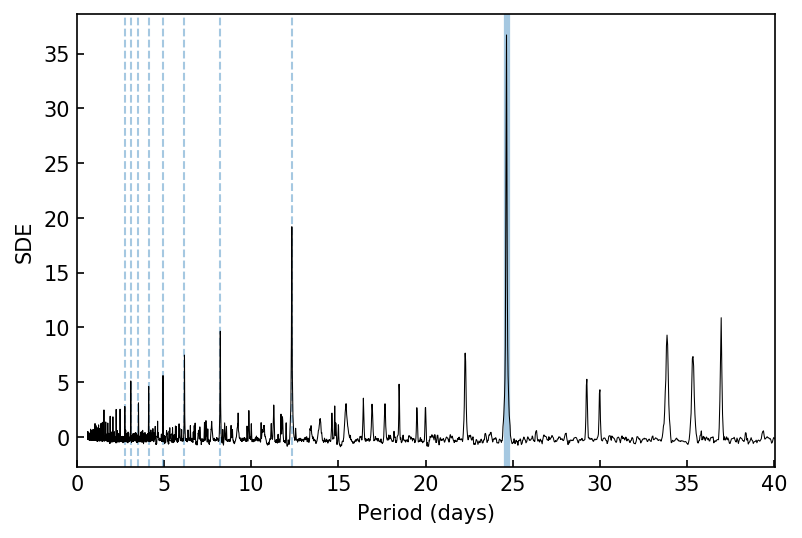

In [3]:
model_second_run = transitleastsquares(t_second_run, y_second_run)
results_second_run = model_second_run.power()
plt.figure()
ax = plt.gca()
ax.axvline(results_second_run.period, alpha=0.4, lw=3)
plt.xlim(numpy.min(results_second_run.periods), numpy.max(results_second_run.periods))
for n in range(2, 10):
    ax.axvline(n*results_second_run.period, alpha=0.4, lw=1, linestyle="dashed")
    ax.axvline(results_second_run.period / n, alpha=0.4, lw=1, linestyle="dashed")
plt.ylabel(r'SDE')
plt.xlabel('Period (days)')
plt.plot(results_second_run.periods, results_second_run.power, color='black', lw=0.5)
plt.xlim(0, max(results_second_run.periods));

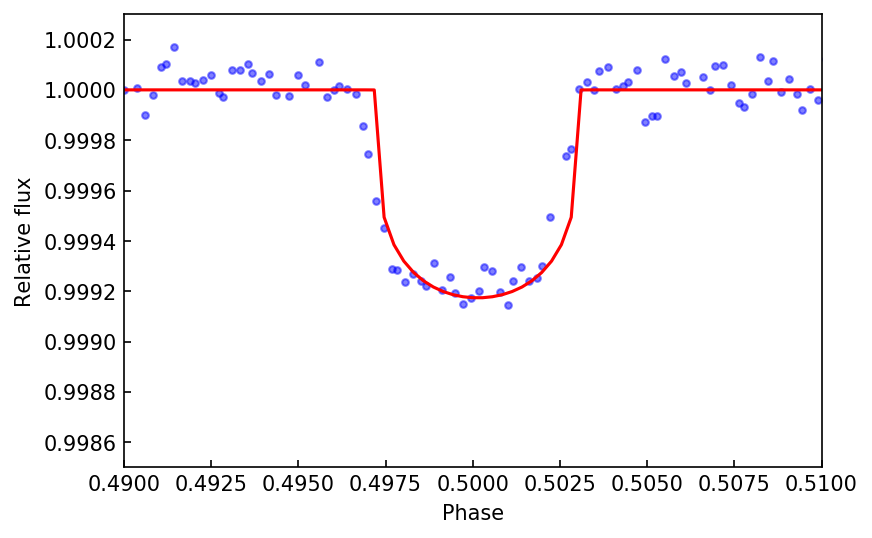

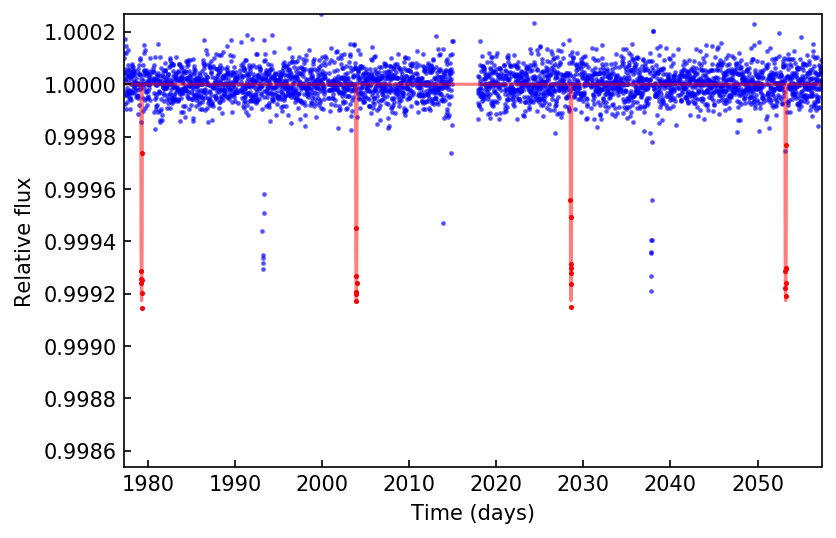

In [4]:
plt.figure()
plt.plot(
    results_second_run.model_folded_phase,
    results_second_run.model_folded_model,
    color='red')
plt.scatter(
    results_second_run.folded_phase,
    results_second_run.folded_y,
    color='blue',
    s=10,
    alpha=0.5,
    zorder=2)
plt.xlim(0.49, 0.51)
plt.ylim(0.9985, 1.0003)
plt.xlabel('Phase')
plt.ylabel('Relative flux');

plt.figure()
in_transit = transit_mask(
    t_second_run,
    results_second_run.period,
    results_second_run.duration,
    results_second_run.T0)
plt.scatter(
    t_second_run[in_transit],
    y_second_run[in_transit],
    color='red',
    s=2,
    zorder=0)
plt.scatter(
    t_second_run[~in_transit],
    y_second_run[~in_transit],
    color='blue',
    alpha=0.5,
    s=2,
    zorder=0)
plt.plot(
    results_second_run.model_lightcurve_time,
    results_second_run.model_lightcurve_model, alpha=0.5, color='red', zorder=1)
plt.xlim(min(t), max(t))
plt.ylim(min(y_filt), max(y_filt))
plt.xlabel('Time (days)')
plt.ylabel('Relative flux');

Looks like another planet (*c*). Again, we mask *c* and inspect the time series:

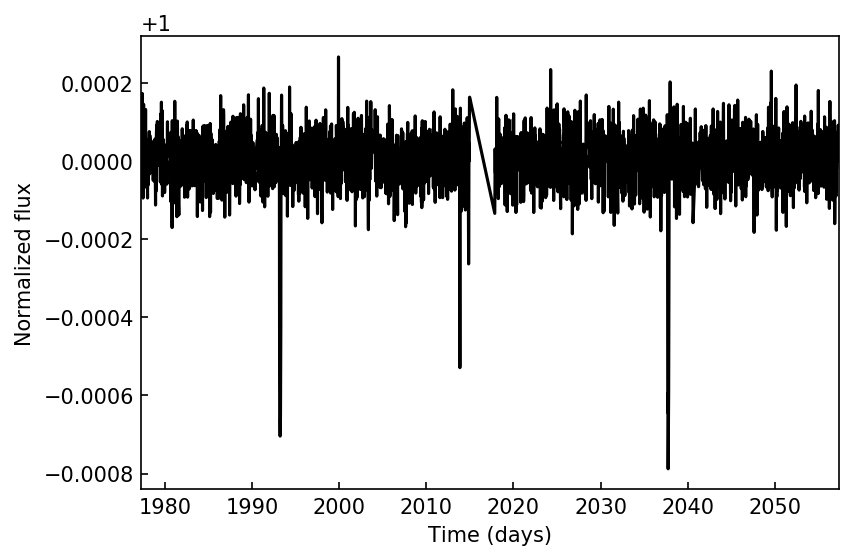

In [5]:

intransit = transit_mask(t_second_run, results_second_run.period, 2*results_second_run.duration, results_second_run.T0)

y_third_run = y_second_run[~intransit]
t_third_run = t_second_run[~intransit]
t_third_run, y_third_run = cleaned_array(t_third_run, y_third_run)


from matplotlib import rcParams; rcParams["figure.dpi"] = 150
plt.figure()
ax = plt.gca()
ax.plot(t_third_run, y_third_run, "k")
ax.set_xlim(t.min(), t.max())
ax.set_xlabel("Time (days)")
ax.set_ylabel("Normalized flux");


Transit Least Squares TLS 1.0.7 (04 January 2019)
Creating model cache for 36 durations
Searching 3487 data points, 8505 periods from 0.602 to 40.036 days, using all 8 CPU threads


100%|██████████| 8505/8505 periods | 00:07<00:00  
 38%|███▊      | 1339/3487 [00:00<00:00, 13384.05it/s]

Searching for best T0 for period 22.28128


100%|██████████| 3487/3487 [00:00<00:00, 14032.82it/s]
/home/michael/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/michael/.local/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/michael/.local/lib/python3.6/site-packages/transitleastsquares/__init__.py:1754: RuntimeWarning: divide by zero encountered in double_scalars
  std_binned = std / intransit_points ** 0.5
/home/michael/.local/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/michael/.local/lib/python3.6/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/michael/.local/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: in

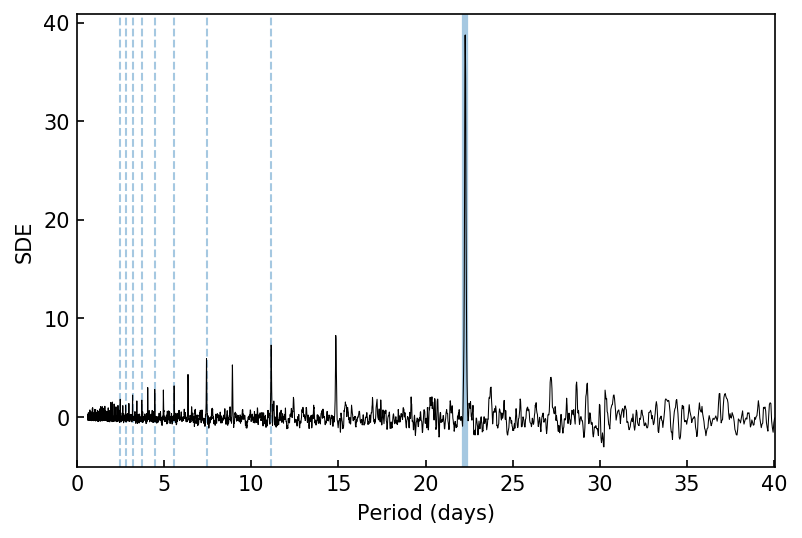

In [6]:
model_third_run = transitleastsquares(t_third_run, y_third_run)
results_third_run = model_third_run.power()
plt.figure()
ax = plt.gca()
ax.axvline(results_third_run.period, alpha=0.4, lw=3)
plt.xlim(numpy.min(results_third_run.periods), numpy.max(results_third_run.periods))
for n in range(2, 10):
    ax.axvline(n*results_third_run.period, alpha=0.4, lw=1, linestyle="dashed")
    ax.axvline(results_third_run.period / n, alpha=0.4, lw=1, linestyle="dashed")
plt.ylabel(r'SDE')
plt.xlabel('Period (days)')
plt.plot(results_third_run.periods, results_third_run.power, color='black', lw=0.5)
plt.xlim(0, max(results_third_run.periods));

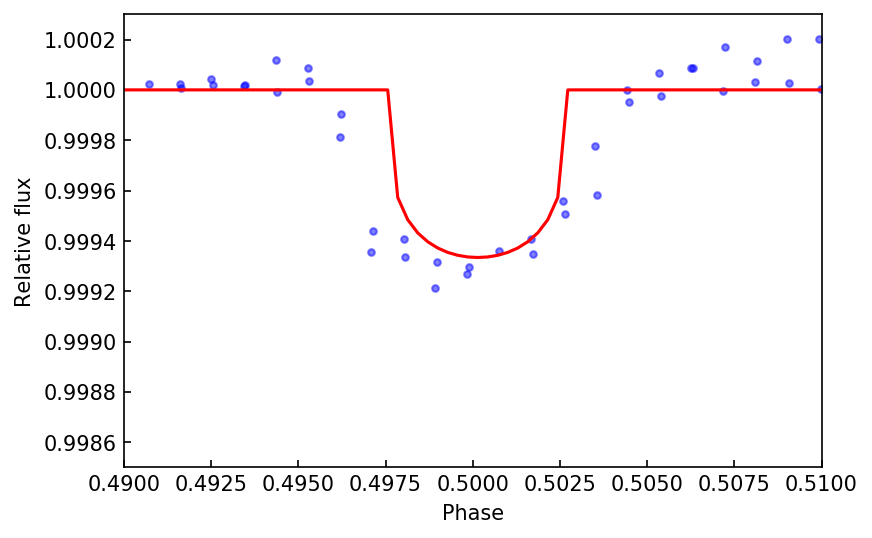

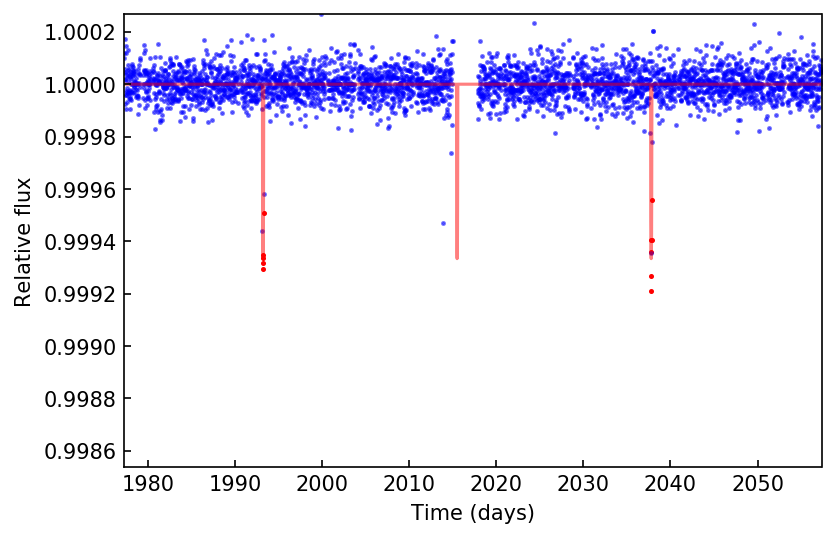

In [7]:
plt.figure()
plt.plot(
    results_third_run.model_folded_phase,
    results_third_run.model_folded_model,
    color='red')
plt.scatter(
    results_third_run.folded_phase,
    results_third_run.folded_y,
    color='blue',
    s=10,
    alpha=0.5,
    zorder=2)
plt.xlim(0.49, 0.51)
plt.ylim(0.9985, 1.0003)
plt.xlabel('Phase')
plt.ylabel('Relative flux');

plt.figure()
in_transit = transit_mask(
    t_third_run,
    results_third_run.period,
    results_third_run.duration,
    results_third_run.T0)
plt.scatter(
    t_third_run[in_transit],
    y_third_run[in_transit],
    color='red',
    s=2,
    zorder=0)
plt.scatter(
    t_third_run[~in_transit],
    y_third_run[~in_transit],
    color='blue',
    alpha=0.5,
    s=2,
    zorder=0)
plt.plot(
    results_third_run.model_lightcurve_time,
    results_third_run.model_lightcurve_model, alpha=0.5, color='red', zorder=1)
plt.xlim(min(t), max(t))
plt.ylim(min(y_filt), max(y_filt))
plt.xlabel('Time (days)')
plt.ylabel('Relative flux');

This is one of the cases where the visualization displays a transit duration apparently too short. This issue is only with the visualization and will hopefully be fixed in the next release. 